In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import yfinance as yf
import heapq
import talib as ta
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_daily_ohlcv(tickers, years=4):
    outo=[]
    outh=[]
    outl=[]
    outc=[]
    outv=[]
    oute=[]
    outdf=[]
    months=str(years*12)
    for ticker in tickers:
        tick=yf.Ticker(ticker)
        df=tick.history(period=months+"mo")
        df=df.reset_index()
        df.dropna(inplace=True)
        outdf.append(df)
    return outdf

In [3]:
def concat_tickers(tickers):
    out=""
    for ticker in tickers:
        out=out+" "+ticker
    return out

In [4]:
def addNS(ticks):
    return [tick+'.NS' for tick in ticks]
s = np.random.normal(0, 1, 1000)
s2 = np.random.normal(0, 1, 1000)

In [5]:
def sh(a):
    a2=a.copy()
    np.random.shuffle(a2)
    return a2

def aggsh(a):
    out=[a[0]]+list(sh(di(a)))
    return accumulate(out)

def sharpe(a):
    return np.mean(a)/np.std(a)

def sharpe2(agg):
    a=di(agg)
    return sharpe(a)*np.sqrt(len(a))

def sigrobust(sigactual,mush,sigmash):
    return np.sign(sigactual)*(abs(sigactual)-mush)/sigmash

def di(a):
    return np.asarray([a[i+1]-a[i] for i in range(len(a)-1)])

In [6]:
def getleneq(array):
    lens=[len(x) for x in array] 
    maxlen=max(lens)
    out=[]
    for lst in array:
        if len(lst)==maxlen:
            out.append(lst)
    return maxlen,np.asarray(out)
def listsum(vecs):
    vecs=getleneq(vecs)[1]
    out=np.asarray(vecs[0])
    for i in range(1,len(vecs)):
        out=out+np.asarray(vecs[i])
    return np.asarray(out)

def accumulate(a):
    out=[a[0]]
    for i in range(1,len(a)):
        out.append(out[i-1]+a[i])
    return np.asarray(out)

def listmean(a):
    return [np.mean(a[i]) for i in range(len(a))]

def klargest(nums, k):
    h = []
    for e in nums:
        heapq.heappush(h, (-e, e))
    klarg=[]
    for i in range(k):
        w, e = heapq.heappop(h)
        klarg.append(e)
    return np.asarray(klarg)

def trunc_sig(signals,trades=5):
    klargabs=klargest(abs(signals),trades)
    out=[]
    for i in range(len(signals)):
        if abs(signals[i]) in klargabs:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])


def trunc_siglo(signals,trades=5):
    klarg=klargest(signals,trades)
    out=[]
    for i in range(len(signals)):
        if signals[i] in klarg and signals[i]>0:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])

def my_kendall_trend(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(np.sign(a[i]-a[j]))
    numpos=len([el for el in out if el>0 ])
    numneg=len([el for el in out if el<0 ])
    return (numpos-numneg)/len(out)

def di_atoa(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out


def di_atoa2(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out/np.std(a)

def ns_mean(a,opt=3):
    if opt==-1:
        return np.mean(a)
    
    if opt==0:
        return np.mean(a)-np.mean(di(a))
    
    elif opt==1:
        halflen=round(len(a)/2)
        if abs(np.mean(a[:halflen]))<=abs(np.mean(a[halflen:])):
            return np.mean(a[:halflen])
        else:
            return 0
    elif opt==2:
        return np.mean(a)-np.mean(di_atoa(a))
    elif opt==3:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==4:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna*kt
        else:
            return 0
    elif opt==5:
        return kalman_mean(a)
    elif opt==-2:
        return np.mean(a)+np.mean(di_atoa(a))
    elif opt==-3:
        kt=np.mean(di_atoa(a))
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==-4:
        return np.mean(a)+np.mean(di_atoa2(a))
    
    elif opt==-5:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-6:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        kt3=np.mean(di_atoa(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
    elif opt==-7:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-8:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        kt3=np.mean(my_kendall_trend(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
        

def sk_minfo(x,y,norm=True):
    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0] 
    iXY=metrics.mutual_info_score(None,None,contingency=cXY) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0]) 
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return iXY


def sk_mic(x,y,norm=True):
    estbins=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    bXYs=[i for i in range(20)]
    iXYs=[]
    for bXY in bXYs:
        cXY=np.histogram2d(x,y,bXY)[0] 
        iXYs.append(metrics.mutual_info_score(None,None,contingency=cXY)) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0])
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return max(iXYs)


def numBins(nObs,corr=None): 
    if corr is None: 
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.) 
        b=round(z/6.+2./(3*z)+1./3) 
    else:  
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5) 
        b=min(b,50)
    return int(b)

def eqwt_memb(logrets,lb=10,cost=0.0,long=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if long:
            pred=np.ones(len(lrs[:,-2+i:i]))
        else:
            pred=-np.ones(len(lrs[:,-2+i:i]))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def random_memb(logrets,lb=10,cost=0.0,longonly=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        randsh=sh(np.arange(len(lrs)))[0]
        randsgn=sh([1,-1])[0]
        if longonly:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])
        else:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])*randsgn
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        #
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def perment(a,m=4,tau=1):    
    return entrp.permutation_entropy(a,m,tau)
def sampent(ts,m=4,r=0.2):
    std_ts = np.std(ts)
    return entrp.sample_entropy(ts, m, r * std_ts)


In [7]:
def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        ret = ret - np.mean(ret)
    dot_prod = np.mean(np.sign(reg[:-delay]*ret2[delay:]))*np.sign(reg[-1])
    return dot_prod


def theta_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2th(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def perm_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def corrcoef_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(np.corrcoef(reg,sh(ret))[0][1])
    return np.mean(outsh)

def skminfo_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sk_minfo(reg,sh(ret)))
    return np.mean(outsh)

def thetamem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(theta_mem(reg,sh(ret))))
    return np.mean(outsh)

def perm_mem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(perm_mem(reg,sh(ret))))
    return np.mean(outsh)


In [8]:
def tp_memb(alphas,logrets,lbmom=20,lf=1,trades=-1,cost=0.0,signed=False,longonly=True,nsopt=-1):
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lbmom,n-mmax-1,mmax+1):
        if signed:
            
            pred=np.sign(listmean(alphas[:,-lbmom+i:i]))
        else:
            
            pred=listmean(alphas[:,-lbmom+i:i])
        if longonly:
            pred=np.heaviside(pred,0)*pred
        if trades>0:
            pred=trunc_siglo(pred,trades)
        
        pred=np.nan_to_num(pred,nan=0)
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=np.asarray(listmean(lrs[:,i:i+lf]))
        out.append(np.dot(pred,np.e**(y)-1))
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    dot_prod = ns_mean(np.sign(reg[:-delay]*ret2[delay:]),nsopt)*np.sign(reg[-1])
    return dot_prod

def multibinfunc2th(reg,ret,dmn=True,opt=0,trig=0,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    if opt==0:
        dot_prod = ns_mean(np.heaviside(np.sign(reg[:-delay])*np.sign(reg[-1]),0)*np.sign(ret2[delay:]),nsopt)
    if abs(dot_prod)>trig:
        return dot_prod
    else:
        return 0

def multibinpred2(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibinpred2th(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2th(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibin2pt_memb(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False,delay=1):
    
    mmax=0
    n,lrs=getleneq(logrets)
    n,rgs=getleneq(regs)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if th:
            pred=multibinpred2th(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        else:
            pred=multibinpred2(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        if trades>0:
            if longonly:
                pred=np.asarray(trunc_siglo(pred,trades))
            else:
                pred=np.asarray(trunc_sig(pred,trades))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        y=lrs[:,i]
       
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def multibin2pt_membml(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False):
    mb1=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=1)
    mb2=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=2)
    mb3=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=3)
    mb4=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=4)
    mb5=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=5)
    return (mb1+mb2+mb3+mb4+mb5)/5

In [9]:
def get_signalact(alphas,logrets,lb=20,delay=1,trades=-1,nsopt=-1,dmn=True,longonly=True,th=False):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=nsopt,th=th,longonly=longonly,dmn=dmn,delay=delay)
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=trades,longonly=longonly)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
        thm=theta_mem(alpha,returns)
        pm=perm_mem(alpha,returns)
        
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem


def get_signalsh(alphas,logrets,lb=20,delay=1):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb)
    tpmem=tp_memb(alphas,logrets,lbmom=lb)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        try:
            outminfo.append(skminfo_sh(np.asarray(alpha[:-1]),np.asarray(returns[1:])))
        except:
            outminfo.append(0)
        thm=thetamem_sh(alpha,returns)
        pm=permmem_sh(alpha,returns)
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem   

In [10]:
def get_signalact2(alphas,logrets,lb=20,delay=1,dmn=True,longonly=False,trades=1):
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=1,longonly=longonly)
    tpmem2=tp_memb(alphas,logrets,lbmom=lb,trades=5,longonly=longonly)
    multimem1=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem2=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem3=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem4=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem5=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem6=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem7=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem8=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=True)
    
    eqmem=eqwt_memb(logrets)
    
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [11]:
def get_signalact2_random(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    #alphas may take some training data; so log returns can be adjusted accordingly
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=random_memb(logrets)
    tpmem2=random_memb(logrets)
    multimem1=random_memb(logrets)
    multimem2=random_memb(logrets)
    multimem3=random_memb(logrets)
    multimem4=random_memb(logrets)
    multimem5=random_memb(logrets)
    multimem6=random_memb(logrets)
    multimem7=random_memb(logrets)
    multimem8=random_memb(logrets)
    eqmem=eqwt_memb(logrets)
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],sh(returns[delay:]))[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],sh(returns[delay:])))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [12]:
from scipy.stats import rankdata
def rankdata_2d(array2d,axis=0):
    """
    Input: 2d array
    Output:
    axis=0: time series rank
    axis=1: cross sectional rank
    """
    if axis==0:
        return np.asarray([rankdata(array1d) for array1d in array2d])
    elif axis==1:
        array2dt=np.transpose(array2d)
        return np.transpose([rankdata(array1d) for array1d in array2dt])
    
# RTime Series Rank
def ts_rank(qty,window=10):
    n,qty=getleneq(qty)[1]
    out=[]
    for i in range(n):
        out.append(rankdata_2d(qty[:,i-window:i])[:,-1])
    return out

# Cross Sectional Rank, also called 'Rank' by Kakushadze
def cs_rank(qty):
    """
    Input: 2-d array of qty
    Output: 2-d array of ranks
    """
    n,qty=getleneq(qty)
    return rankdata_2d(qty,axis=1)

#Calculate and store the Log Returns
def logrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def idlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Intraday Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Open']))
    return getleneq(sectalpha1)[1]

def onlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Overnight Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Open']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def get_opens(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Open'])
    return getleneq(sectalpha1)[1]

def get_volumes(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Volume'])
    return getleneq(sectalpha1)[1]

In [13]:
##########################
#Universe 2: TICKS PER MINUTE
#Stocks ordered by number of trades per minute
#These are the most liquid; hence lower costs are expected as the ltp is supposed to reflect the traded price
#Costs can be taken to be 0.06 percent per round trip trade
#tickers_tpm(50) in Utils_Backtests
tickers_tpm=['AAPL', 'TSLA', 'SPY', 'QQQ', 'SQQQ', 'MSFT', 'AMZN', 'NVDA',
       'ORCL', 'FB', 'INTC', 'SNAP', 'XOM', 'UBER', 'NLOK', 'XLK', 'CHWY',
       'BA', 'PYPL', 'IWM', 'T', 'CVX', 'DOCU', 'WFC', 'GDX', 'GE', 'BAC',
       'KR', 'CSCO', 'MU', 'OXY', 'C', 'WMT', 'PFE', 'KO', 'SQ', 'CMCSA',
       'XLE', 'UAL', 'EWZ', 'FSLY', 'OSTK', 'BABA', 'JPM', 'XLI', 'NFLX',
       'CVS', 'V', 'DAL', 'MGM']

In [14]:
stock=get_daily_ohlcv(tickers_tpm)

In [15]:
type(stock)

list

In [16]:
def getting_close(data):
    for i in range(len(data)):
        cl=data[i]['Close']
    return cl

In [17]:
Close = getting_close(stock)   
Close

0       29.243311
1       29.624208
2       30.090807
3       29.824179
4       30.043198
          ...    
1002    40.709999
1003    40.410000
1004    39.419998
1005    37.930000
1006    38.840000
Name: Close, Length: 1007, dtype: float64

In [18]:
def getting_open(data):
    for i in range(len(data)):
        op=data[i]['Open']
    return op

In [19]:
Open = getting_open(stock)
Open

0       29.005251
1       29.329013
2       29.900358
3       29.767045
4       29.890839
          ...    
1002    40.500000
1003    40.779999
1004    40.020000
1005    38.790001
1006    37.799999
Name: Open, Length: 1007, dtype: float64

In [20]:
def getting_high(data):
    for i in range(len(data)):
        hi=data[i]['High']
    return hi

In [21]:
High = getting_high(stock)
High

0       29.481371
1       29.690865
2       30.433612
3       30.052716
4       30.195556
          ...    
1002    40.750000
1003    40.910000
1004    40.020000
1005    38.919998
1006    38.994999
Name: High, Length: 1007, dtype: float64

In [22]:
def getting_low(data):
    for i in range(len(data)):
        lo=data[i]['Low']
    return lo

In [23]:
Low = getting_low(stock)
Low

0       28.605311
1       28.976684
2       29.757522
3       29.567073
4       29.719436
          ...    
1002    39.840000
1003    40.220001
1004    38.910000
1005    37.500000
1006    37.564999
Name: Low, Length: 1007, dtype: float64

In [24]:
def getting_volume(data):
    for i in range(len(data)):
        vo=data[i]['Volume']
        return vo

In [25]:
Volume = getting_volume(stock)
Volume

0       109712400
1       105474000
2        86418400
3        77596400
4        79275600
          ...    
1002     72282600
1003     59318800
1004    103296000
1005     92131300
1006     64262674
Name: Volume, Length: 1007, dtype: int64

In [26]:
#ADX - Average Directional Movement Index
#real = ADX(high, low, close, timeperiod=14)
def mi01(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            out=ta.ADX(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=10)
            ou=np.nan_to_num(out, 0)
            mi.append(np.asarray(ou))
    return getleneq(mi)[1]

In [27]:
mi01(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 20.08669627,
        19.78743161, 18.13592876],
       [ 0.        ,  0.        ,  0.        , ..., 23.01152244,
        23.73891392, 22.38716222],
       [ 0.        ,  0.        ,  0.        , ..., 12.14872487,
        12.00744948, 11.88030163],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 24.25027956,
        23.8628403 , 23.85849682],
       [ 0.        ,  0.        ,  0.        , ..., 27.76688253,
        28.45985118, 29.0572868 ],
       [ 0.        ,  0.        ,  0.        , ..., 17.31381972,
        18.67427219, 19.7509617 ]])

In [28]:
len(mi01(stock))

46

In [29]:
len(idlogrets(stock))

46

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


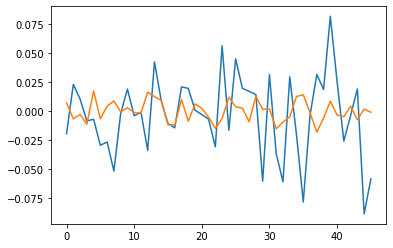

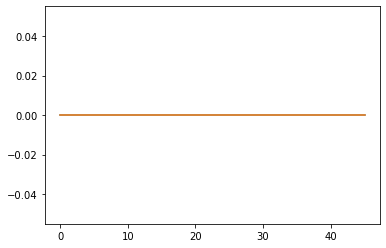

Wall time: 2min 12s


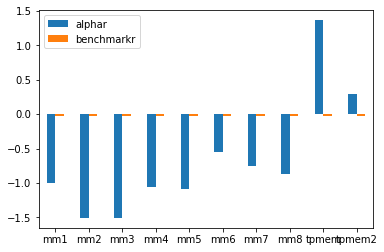

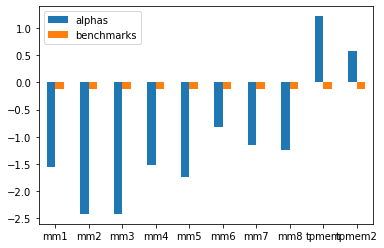

In [30]:
%%time
sig=get_signalact2(mi01(stock), idlogrets(stock), delay=1)

In [31]:
#ADXR - Average Directional Movement Index Rating
#real = ADXR(high, low, close, timeperiod=14)
def mi02(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.ADXR(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            b=np.nan_to_num(a, 0)
            mi.append(np.asarray(b))
    return getleneq(mi)[1]
        
mi02(stock)        

array([[ 0.        ,  0.        ,  0.        , ..., 28.74436434,
        27.62952653, 25.98963474],
       [ 0.        ,  0.        ,  0.        , ..., 15.17827238,
        15.14338675, 14.87030789],
       [ 0.        ,  0.        ,  0.        , ..., 13.93260071,
        13.3940092 , 12.61710291],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 19.53048502,
        19.57459372, 19.52079815],
       [ 0.        ,  0.        ,  0.        , ..., 31.50092542,
        31.29943496, 31.48814086],
       [ 0.        ,  0.        ,  0.        , ..., 19.69832611,
        20.29633202, 21.00878868]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


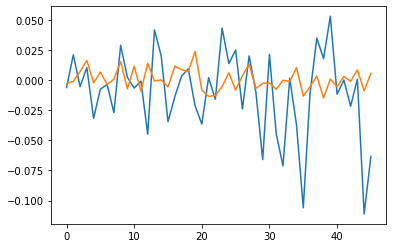

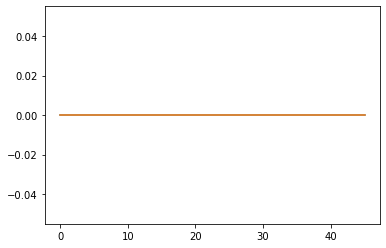

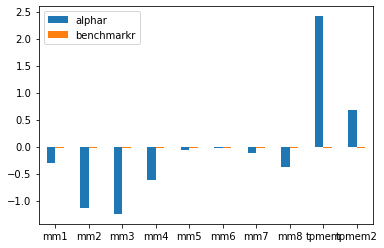

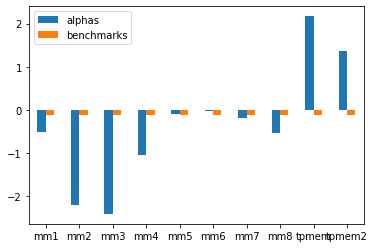

In [32]:
sig=get_signalact2(mi02(stock), idlogrets(stock), delay=1)

In [33]:
#APO - Absolute Price Oscillator
#real = APO(close, fastperiod=12, slowperiod=26, matype=0)
def mi03(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            a=ta.APO(np.asarray(list(data[i]['Close'])), fastperiod=12, slowperiod=26, matype=0)
            v=np.nan_to_num(a,0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi03(stock)    

array([[ 0.        ,  0.        ,  0.        , ...,  0.44985062,
         0.60170824,  0.6959566 ],
       [ 0.        ,  0.        ,  0.        , ..., 27.66679578,
        26.64480904, 24.21503507],
       [ 0.        ,  0.        ,  0.        , ...,  3.50352869,
         3.69666877,  3.78509815],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -4.12983303,
        -4.97420688, -5.1688924 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.56442295,
        -0.50121806, -0.45673079],
       [ 0.        ,  0.        ,  0.        , ...,  0.03019216,
         0.2019871 ,  0.39410263]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


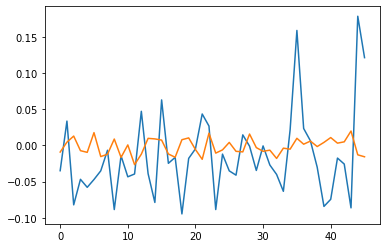

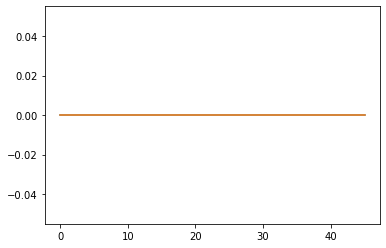

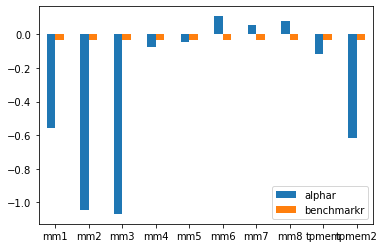

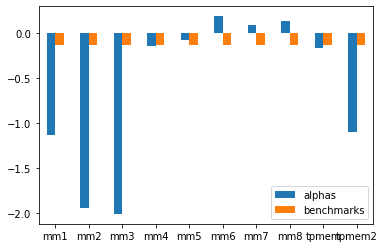

In [34]:
sig=get_signalact2(mi03(stock), idlogrets(stock), delay=1)

In [35]:
#AROON - Aroon
#aroondown, aroonup = AROON(high, low, timeperiod=14)
def mi04(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            up,down=ta.AROON(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            cu=up - down
            ed=np.nan_to_num(cu, 0)
            mi.append(np.asarray(ed))
    return getleneq(mi)[1]

mi04(stock)

array([[   0.        ,    0.        ,    0.        , ...,  -92.85714286,
        -100.        ,  -85.71428571],
       [   0.        ,    0.        ,    0.        , ...,  -92.85714286,
         -85.71428571,  -78.57142857],
       [   0.        ,    0.        ,    0.        , ..., -100.        ,
         -64.28571429,  -64.28571429],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  100.        ,
          92.85714286,   85.71428571],
       [   0.        ,    0.        ,    0.        , ...,   35.71428571,
          35.71428571,   28.57142857],
       [   0.        ,    0.        ,    0.        , ...,  -57.14285714,
         -57.14285714,  -57.14285714]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


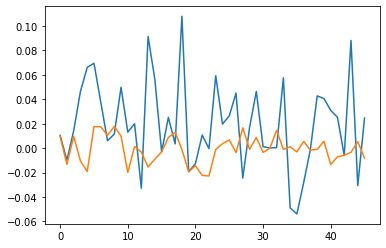

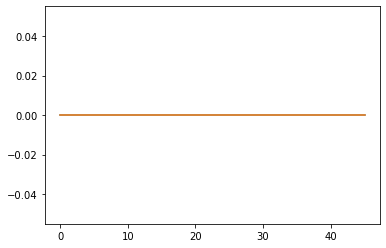

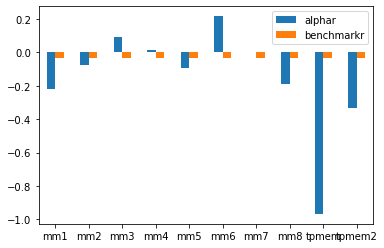

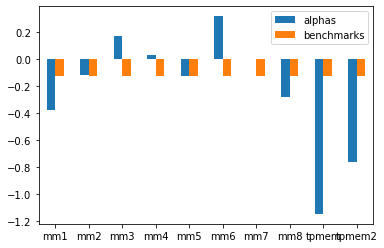

In [36]:
sig=get_signalact2(mi04(stock), idlogrets(stock), delay=1)

In [37]:
# AROONOSC - Aroon Oscillator
# real = AROONOSC(high, low, timeperiod=14)
def mi05(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            f=ta.AROONOSC(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            e=np.nan_to_num(f, 0)
            mi.append(np.asarray(e))
    return getleneq(mi)[1]

mi05(stock)

array([[   0.        ,    0.        ,    0.        , ...,   92.85714286,
         100.        ,   85.71428571],
       [   0.        ,    0.        ,    0.        , ...,   92.85714286,
          85.71428571,   78.57142857],
       [   0.        ,    0.        ,    0.        , ...,  100.        ,
          64.28571429,   64.28571429],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -100.        ,
         -92.85714286,  -85.71428571],
       [   0.        ,    0.        ,    0.        , ...,  -35.71428571,
         -35.71428571,  -28.57142857],
       [   0.        ,    0.        ,    0.        , ...,   57.14285714,
          57.14285714,   57.14285714]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


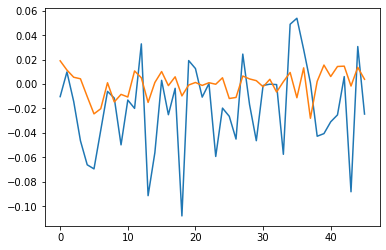

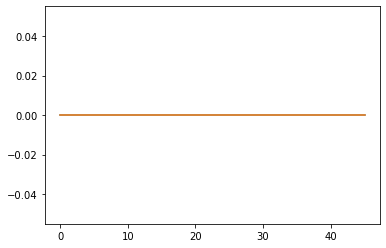

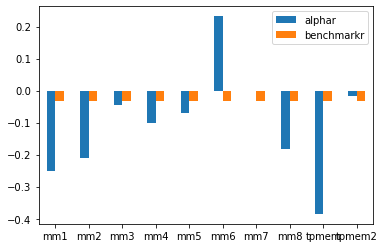

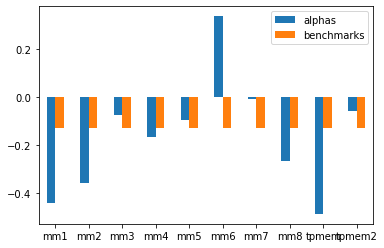

In [38]:
sig=get_signalact2(mi05(stock), idlogrets(stock), delay=1)

In [39]:
#BOP - Balance Of Power
#real = BOP(open, high, low, close)

def mi06(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            g=ta.BOP(np.asarray(list(data[i]['Open'])), np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])))
            h=np.nan_to_num(g, 0)
            mi.append(np.asarray(h))
    return getleneq(mi)[1]
mi06(stock)

array([[-0.12949668, -0.10431418,  0.78283151, ...,  0.54661042,
        -0.01544145, -0.73099128],
       [-0.66463681, -0.5697937 ,  0.04517327, ..., -0.57099814,
        -0.27000598,  0.79587447],
       [-0.09547068,  0.18977769,  0.90338275, ...,  0.5754736 ,
        -0.04865752, -0.50298801],
       ...,
       [ 0.37391529,  0.58823573,  0.5943384 , ...,  0.59658989,
        -0.19183747, -0.52617956],
       [-0.23171038,  0.5818144 , -0.78571123, ...,  0.42105246,
        -0.39830602,  0.13084415],
       [ 0.27173967,  0.41333516,  0.28169158, ..., -0.54054231,
        -0.60563501,  0.72727321]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


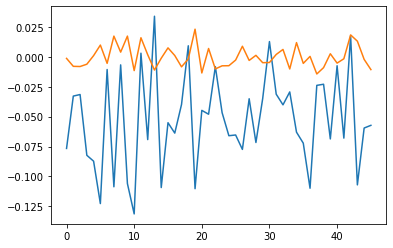

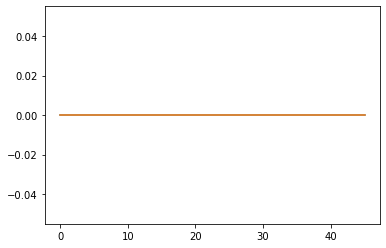

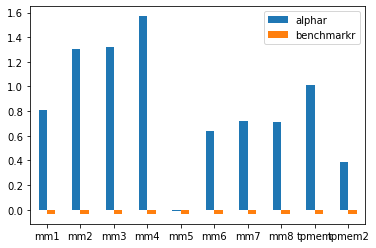

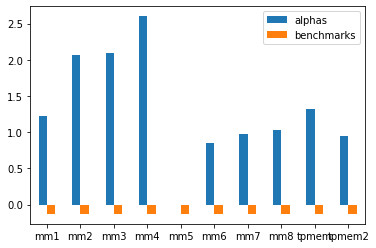

In [40]:
sig=get_signalact2(mi06(stock), idlogrets(stock), delay=1)

In [41]:
# CCI - Commodity Channel Index
# real = CCI(high, low, close, timeperiod=14)
def mi07(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            i=ta.CCI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            j=np.nan_to_num(i, 0)
            mi.append(np.asarray(j))
    return getleneq(mi)[1]

mi07(stock)

array([[   0.        ,    0.        ,    0.        , ...,  195.77223074,
         176.37320744,   62.27421877],
       [   0.        ,    0.        ,    0.        , ...,  -43.5622358 ,
        -181.43497495,  -93.88572006],
       [   0.        ,    0.        ,    0.        , ...,  127.92569662,
          44.41216233,    9.84077064],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  -87.03223474,
         -67.39886972,  -82.26938497],
       [   0.        ,    0.        ,    0.        , ...,  -53.37632859,
        -121.09682552,  -99.41404959],
       [   0.        ,    0.        ,    0.        , ...,   38.59646182,
         -55.23041672,  -30.63066084]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


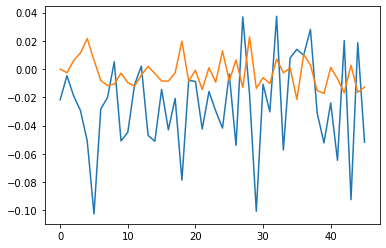

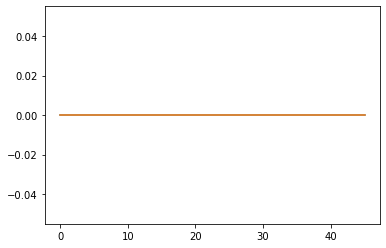

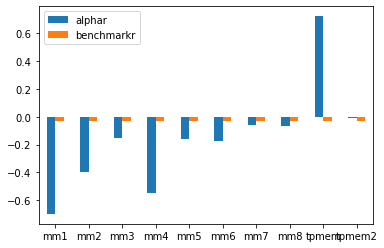

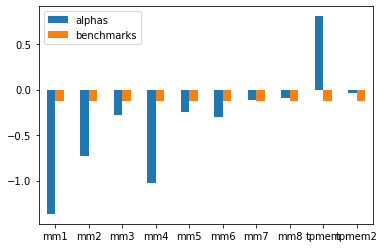

In [42]:
sig=get_signalact2(mi07(stock), idlogrets(stock), delay=1)

In [43]:
# CMO - Chande Momentum Oscillator
# real = CMO(close, timeperiod=14)
def mi08(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            u=ta.CMO(np.asarray(list(data[i]['Close'])), timeperiod=10)
            v=np.nan_to_num(u, 0)
            mi.append(np.asarray(v))
    return getleneq(mi)[1]
mi08(stock)

array([[  0.        ,   0.        ,   0.        , ...,  45.35892637,
         33.14083777,   3.19182186],
       [  0.        ,   0.        ,   0.        , ...,  -6.23461241,
        -21.86467036,   0.6728635 ],
       [  0.        ,   0.        ,   0.        , ...,  43.33882651,
         18.8661988 ,   0.81766998],
       ...,
       [  0.        ,   0.        ,   0.        , ..., -15.99338886,
        -19.260389  , -25.52239972],
       [  0.        ,   0.        ,   0.        , ...,  -8.38042618,
        -21.5742458 , -20.73426684],
       [  0.        ,   0.        ,   0.        , ...,  -0.4226079 ,
        -20.34621199,  -5.95953879]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


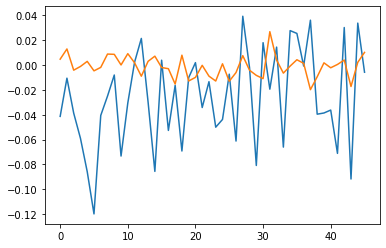

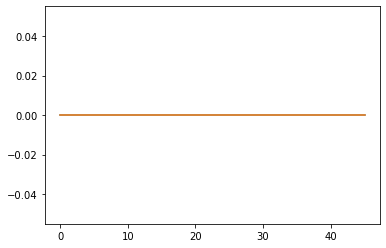

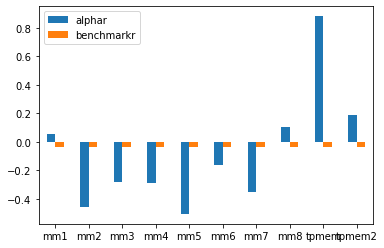

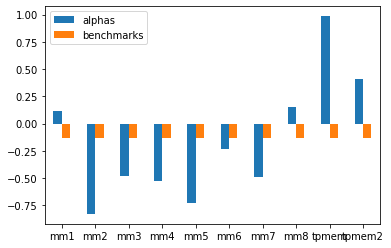

In [44]:
sig=get_signalact2(mi08(stock), idlogrets(stock), delay=1)

In [45]:
#DX - Directional Movement Index
#real = DX(high, low, close, timeperiod=14
def mi09(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            e=ta.DX(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            d=np.nan_to_num(e, 0)
            mi.append(np.asarray(d))
    return getleneq(mi)[1]
mi09(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 15.50433783,
        18.4392561 ,  4.13026331],
       [ 0.        ,  0.        ,  0.        , ...,  3.36914762,
        18.77982411,  4.92442595],
       [ 0.        ,  0.        ,  0.        , ...,  5.64316487,
         4.77291201,  4.77291201],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 16.62437569,
        15.82501061, 18.30068587],
       [ 0.        ,  0.        ,  0.        , ..., 27.60630133,
        32.96942119, 32.79281096],
       [ 0.        ,  0.        ,  0.        , ..., 14.66723918,
        26.60319788, 25.59684214]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


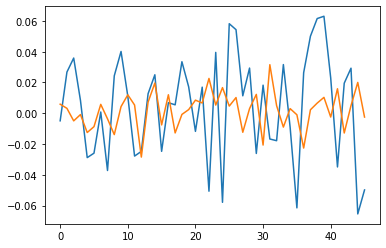

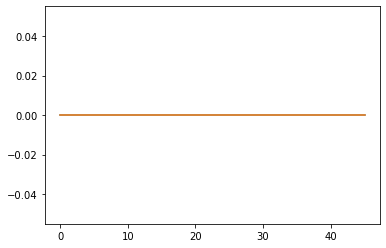

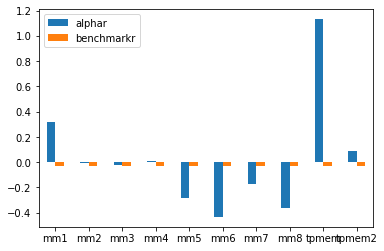

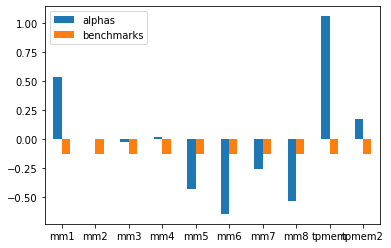

In [46]:
sig=get_signalact2(mi09(stock), idlogrets(stock), delay=1)

In [47]:
# MACD - Moving Average Convergence/Divergence
# macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

def mi10(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACD(np.asarray(list(data[i]['Close'])), fastperiod=12, slowperiod=26, signalperiod=9)
            macd1 = np.nan_to_num(macd, 0)
            mi.append(np.asarray(macd1))
    return getleneq(mi)[1]
mi10(stock)

array([[ 0.        ,  0.        ,  0.        , ...,  2.09914755,
         2.15875785,  1.95031859],
       [ 0.        ,  0.        ,  0.        , ..., 14.70604622,
        10.84867419,  9.70237238],
       [ 0.        ,  0.        ,  0.        , ...,  3.83164806,
         3.6487161 ,  3.24324155],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.48544425,
        -1.60641929, -1.81172587],
       [ 0.        ,  0.        ,  0.        , ..., -0.62329622,
        -0.69357039, -0.73673572],
       [ 0.        ,  0.        ,  0.        , ..., -0.05666887,
        -0.17804862, -0.1985251 ]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


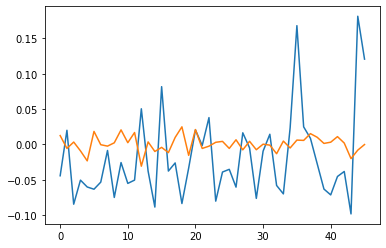

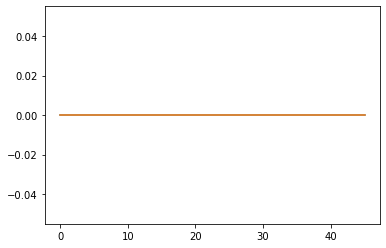

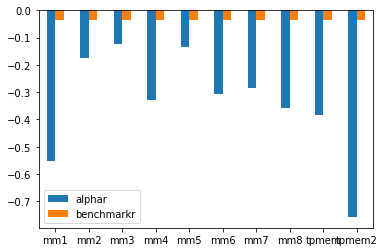

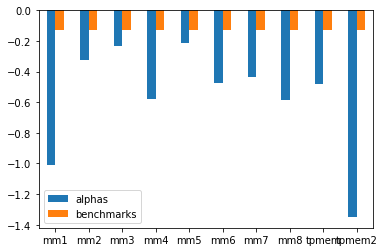

In [48]:
sig=get_signalact2(mi10(stock), idlogrets(stock), delay=1)

In [49]:
# MACDEXT - MACD with controllable MA type
# macd, macdsignal, macdhist = MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
def mi11(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACDEXT(np.asarray(list(data[i]['Close'])), fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
            macd2 = np.nan_to_num(macd, 0)
            mi.append(np.asarray(macd2))
    return getleneq(mi)[1]
mi11(stock)

array([[ 0.        ,  0.        ,  0.        , ...,  0.44985062,
         0.60170824,  0.6959566 ],
       [ 0.        ,  0.        ,  0.        , ..., 27.66679578,
        26.64480904, 24.21503507],
       [ 0.        ,  0.        ,  0.        , ...,  3.50352869,
         3.69666877,  3.78509815],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -4.12983303,
        -4.97420688, -5.1688924 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.56442295,
        -0.50121806, -0.45673079],
       [ 0.        ,  0.        ,  0.        , ...,  0.03019216,
         0.2019871 ,  0.39410263]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


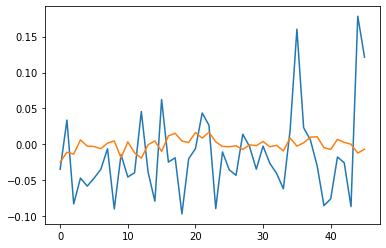

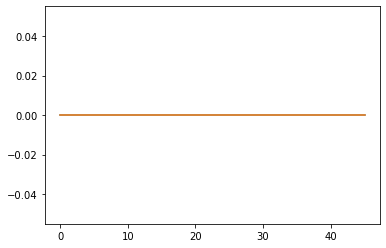

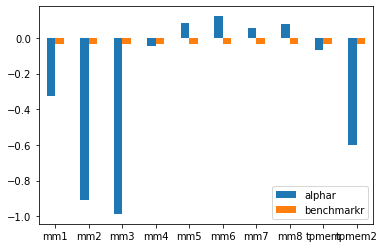

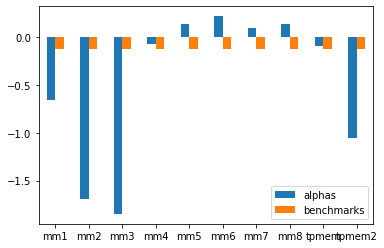

In [50]:
sig=get_signalact2(mi11(stock), idlogrets(stock), delay=1)

In [51]:
# MACDFIX - Moving Average Convergence/Divergence Fix
# macd, macdsignal, macdhist = MACDFIX(close, signalperiod=9)

def mi12(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            macd, macdsignal, macdhist = ta.MACDFIX(np.asarray(list(data[i]['Close'])), signalperiod=9)
            macd3 = np.nan_to_num(macd, 0)
            mi.append(np.asarray(macd3))
    return getleneq(mi)[1]
mi12(stock)

array([[ 0.        ,  0.        ,  0.        , ...,  1.99903337,
         2.05464726,  1.85850895],
       [ 0.        ,  0.        ,  0.        , ..., 14.03428383,
        10.40748305,  9.31870194],
       [ 0.        ,  0.        ,  0.        , ...,  3.64656221,
         3.4753067 ,  3.09418375],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.3984498 ,
        -1.51735187, -1.71489382],
       [ 0.        ,  0.        ,  0.        , ..., -0.59651469,
        -0.66191032, -0.70213091],
       [ 0.        ,  0.        ,  0.        , ..., -0.05996313,
        -0.17276435, -0.19126072]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


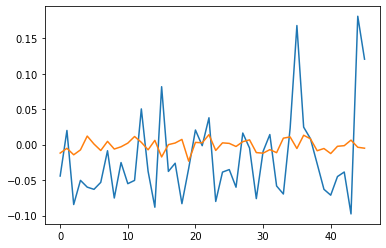

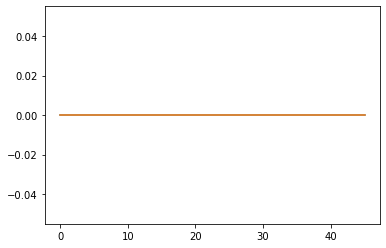

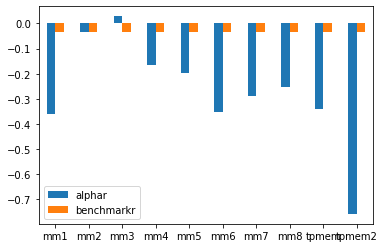

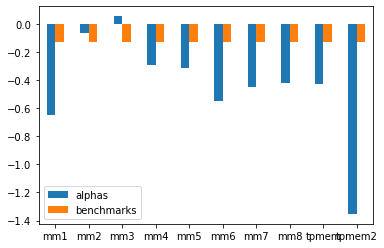

In [52]:
sig=get_signalact2(mi12(stock), idlogrets(stock), delay=1)

In [53]:
# MFI - Money Flow Index
# real = MFI(high, low, close, volume, timeperiod=14)
def mi13(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            s=ta.MFI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), np.asarray((list(data[i]['Volume'])), dtype='f8'), timeperiod=14)
            x=np.nan_to_num(s, 0)
            mi.append(np.asarray(x))
    return getleneq(mi)[1]
mi13(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 63.72573209,
        75.71959911, 68.86483945],
       [ 0.        ,  0.        ,  0.        , ..., 69.18349012,
        62.03365451, 60.29277367],
       [ 0.        ,  0.        ,  0.        , ..., 75.94267774,
        64.71514749, 58.07873464],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 29.497913  ,
        36.97916769, 30.61605549],
       [ 0.        ,  0.        ,  0.        , ..., 41.52643852,
        36.21578059, 35.6523802 ],
       [ 0.        ,  0.        ,  0.        , ..., 71.34249417,
        65.09761624, 64.62437325]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


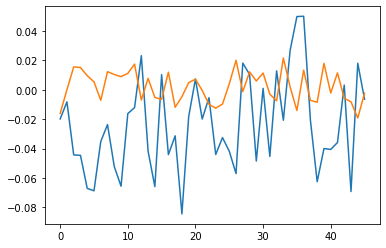

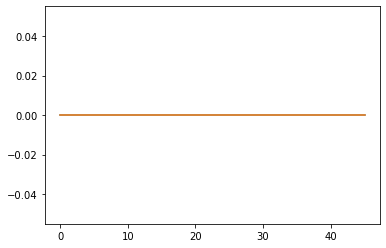

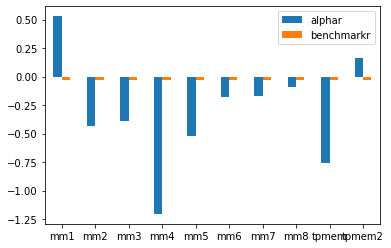

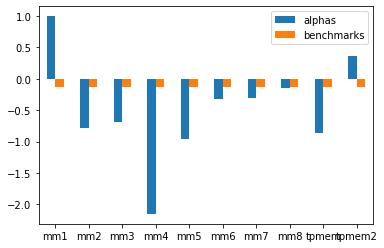

In [54]:
sig=get_signalact2(mi13(stock), idlogrets(stock), delay=1)

In [55]:
# MINUS_DI - Minus Directional Indicator
# real = MINUS_DI(high, low, close, timeperiod=14
def mi14(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            w=ta.MINUS_DI(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), np.asarray(list(data[i]['Close'])), timeperiod=14)
            k=np.nan_to_num(w, 0)
            mi.append(np.asarray(k))
    return getleneq(mi)[1]
mi14(stock)

array([[ 0.        ,  0.        ,  0.        , ..., 17.91396863,
        16.57700379, 20.03634975],
       [ 0.        ,  0.        ,  0.        , ..., 25.60717649,
        31.05371544, 28.28337895],
       [ 0.        ,  0.        ,  0.        , ..., 22.27641652,
        23.72822536, 21.97545805],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 29.78636433,
        28.49121936, 28.83036355],
       [ 0.        ,  0.        ,  0.        , ..., 26.42048558,
        27.2507836 , 25.74918823],
       [ 0.        ,  0.        ,  0.        , ..., 27.19509556,
        31.59058498, 29.35271656]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


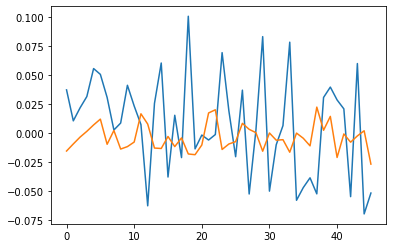

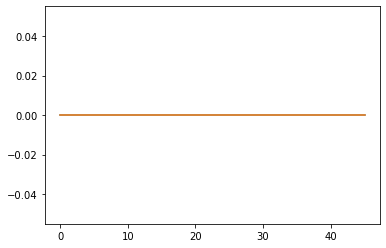

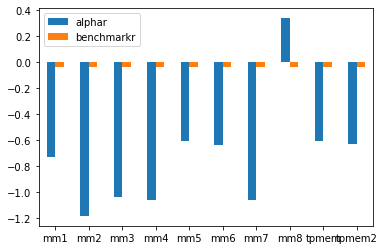

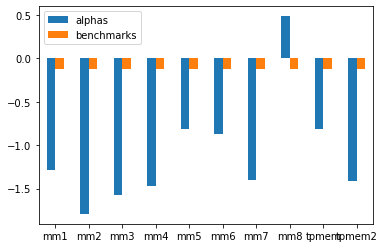

In [56]:
sig=get_signalact2(mi14(stock), idlogrets(stock), delay=1)

In [57]:
# MINUS_DM - Minus Directional Movement
# real = MINUS_DM(high, low, timeperiod=14)
def mi15(data):
    mi=[]
    for i in range(len(data)):
        if len(data[i])>0:
            h=ta.MINUS_DM(np.asarray(list(data[i]['High'])), np.asarray(list(data[i]['Low'])), timeperiod=14)
            m=np.nan_to_num(h, 0)
            mi.append(np.asarray(m))
    return getleneq(mi)[1]
mi15(stock)
        
        

array([[  0.        ,   0.        ,   0.        , ...,   6.19529074,
          5.75276998,   7.14186089],
       [  0.        ,   0.        ,   0.        , ...,  80.84757904,
        102.63274953,  95.30183885],
       [  0.        ,   0.        ,   0.        , ...,   9.38282006,
         10.73260764,   9.96599281],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  17.28862193,
         16.05372036,  15.68702483],
       [  0.        ,   0.        ,   0.        , ...,   5.15270385,
          5.38465586,   5.00003759],
       [  0.        ,   0.        ,   0.        , ...,   5.35344001,
          6.38105128,   5.92526191]])

1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46
1007
46


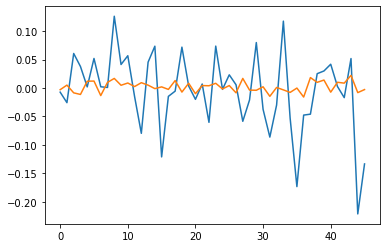

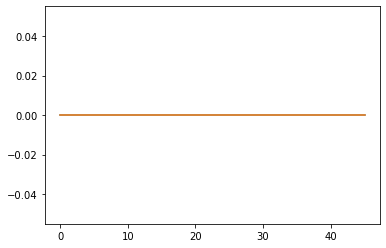

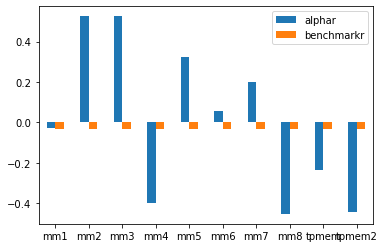

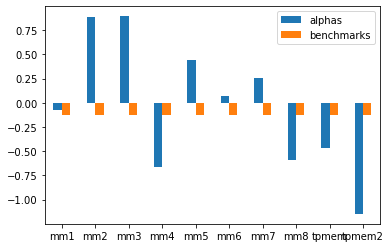

In [58]:
sig=get_signalact2(mi15(stock), idlogrets(stock), delay=1)

In [59]:
type(mi15(stock))

numpy.ndarray